# Data set Context

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

# Task  : 
In this project we investigate the relationship between water salinity and Other Features. Also we predict the change of salinity based on multiple features.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,max_error

**Importing Data Set** : 
Importing dataset from downloaded file on System using Panda package

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\calcofi ULR & MLR\\bottle.csv" )

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
original_data .head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This Shows Data has 74 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(864863, 74)

This dataset has 864863 enteries/rows and 74 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

Result of this code shows 65 features are of float data type , 5 are of int data type and 4 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


# Null Values

In [7]:
original_data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

Clearly there many features which have only nan values.
So we need drop these features which has more than 3,00,000 null values

In [8]:
# We drop columns/features with more than 300000 nan values

data_wo_null = original_data.dropna(axis = 'columns' , thresh = 500000)

In [9]:
# To check new shape of the data
data_wo_null.shape  

(864863, 35)

### Now we drop null values from rows

In [10]:
data_wo_nan = data_wo_null.dropna()

In [11]:
data_wo_nan.shape

(299536, 35)

# Correlation 

We find correlation between features which have numerical values or which are not object dtypes.

In [12]:
cont_features = data_wo_nan.select_dtypes(exclude='object')

In [13]:
cont_features .corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
Cst_Cnt,1.000000,0.999000,-0.081106,0.102204,0.066783,0.031188,-0.049443,0.036845,0.031149,-0.066361,...,-0.081106,0.102204,0.102137,0.066783,-0.049430,0.048838,-0.088282,0.031188,0.036845,-0.080882
Btl_Cnt,0.999000,1.000000,-0.080500,0.101286,0.066162,0.030933,-0.048658,0.036385,0.030892,-0.069121,...,-0.080500,0.101286,0.101219,0.066162,-0.048645,0.048035,-0.087980,0.030933,0.036385,-0.080272
Depthm,-0.081106,-0.080500,1.000000,-0.683267,0.532970,-0.576093,0.683939,-0.586503,-0.576206,0.090751,...,1.000000,-0.683267,-0.686249,0.532970,0.683937,-0.675727,0.935248,-0.576093,-0.586503,0.999995
T_degC,0.102204,0.101286,-0.683267,1.000000,-0.383308,0.753887,-0.958361,0.816743,0.754449,-0.094410,...,-0.683267,1.000000,0.999991,-0.383308,-0.958358,0.959167,-0.793957,0.753887,0.816743,-0.682083
Salnty,0.066783,0.066162,0.532970,-0.383308,1.000000,-0.784321,0.610570,-0.736823,-0.784161,0.053681,...,0.532970,-0.383308,-0.385158,1.000000,0.610569,-0.604459,0.623660,-0.784321,-0.736823,0.531967
O2ml_L,0.031188,0.030933,-0.576093,0.753887,-0.784321,1.000000,-0.871367,0.992438,0.999999,-0.079470,...,-0.576093,0.753887,0.754496,-0.784321,-0.871367,0.868021,-0.743156,1.000000,0.992438,-0.574491
STheta,-0.049443,-0.048658,0.683939,-0.958361,0.610570,-0.871367,1.000000,-0.915233,-0.871849,0.090970,...,0.683939,-0.958361,-0.958650,0.610570,0.999996,-0.999865,0.817319,-0.871367,-0.915233,0.682609
O2Sat,0.036845,0.036385,-0.586503,0.816743,-0.736823,0.992438,-0.915233,1.000000,0.992569,-0.081802,...,-0.586503,0.816743,0.817151,-0.736823,-0.915232,0.913059,-0.754029,0.992438,1.000000,-0.584945
Oxy_µmol/Kg,0.031149,0.030892,-0.576206,0.754449,-0.784161,0.999999,-0.871849,0.992569,1.000000,-0.079486,...,-0.576206,0.754449,0.755056,-0.784161,-0.871849,0.868515,-0.743284,0.999999,0.992569,-0.574604
RecInd,-0.066361,-0.069121,0.090751,-0.094410,0.053681,-0.079470,0.090970,-0.081802,-0.079486,1.000000,...,0.090751,-0.094410,-0.094536,0.053681,0.090971,-0.090148,0.105977,-0.079470,-0.081802,0.090587


# Feature Selection
First we have 73 features but after droping features with alot of nan values and object dtype fetaures we left with 33 features. So, we need to select top 10 features which affect Salinty of water maximum

In [14]:
features = cont_features.loc[:, cont_features.columns != 'Salnty']

In [15]:
target = cont_features.loc[:,cont_features.columns=='Salnty']

### For Feature Selection we use Annova function in SelectKBest 
First we import some functions from modules of some packages

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [17]:
bestfeatures = SelectKBest(score_func=f_classif,k=3)

In [18]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.head()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [12 13 17 18 19 20 21] are constant.
  UserWarning)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0
0,12.089993
1,12.360035
2,110.755111
3,58.889743
4,330.684386


In [19]:
feature_column_name=pd.DataFrame(features.columns)
feature_column_name.head()

,0
0,Cst_Cnt
1,Btl_Cnt
2,Depthm
3,T_degC
4,O2ml_L


In [20]:
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

,Features,Score
0,Cst_Cnt,1.208999e+01
1,Btl_Cnt,1.236004e+01
2,Depthm,1.107551e+02
3,T_degC,5.888974e+01
4,O2ml_L,3.306844e+02
5,STheta,1.083246e+02
6,O2Sat,2.353544e+02
7,Oxy_µmol/Kg,3.300096e+02
8,RecInd,6.857633e+01
9,T_prec,2.709966e+00


### Top 10 Features with best scores

In [21]:
print(feature_score_df.nlargest(10,'Score'))

       Features         Score
25   R_SALINITY  1.048962e+14
4        O2ml_L  3.306844e+02
29         R_O2  3.306844e+02
7   Oxy_µmol/Kg  3.300096e+02
10       S_prec  2.570657e+02
6         O2Sat  2.353544e+02
30      R_O2Sat  2.353543e+02
28      R_DYNHT  1.409852e+02
2        Depthm  1.107551e+02
22      R_Depth  1.107551e+02


# Model Dataset

In [22]:
model_data = cont_features[['R_SALINITY','O2ml_L','R_O2','Oxy_µmol/Kg','S_prec','O2Sat','R_O2Sat','R_DYNHT','Depthm','R_Depth','Salnty']]
model_data .head(5)

,R_SALINITY,O2ml_L,R_O2,Oxy_µmol/Kg,S_prec,O2Sat,R_O2Sat,R_DYNHT,Depthm,R_Depth,Salnty
2160,33.030,5.90,5.90,256.9761,2.0,92.8,92.8,0.00,0,0.0,33.030
2162,32.951,6.04,6.04,263.0892,3.0,95.0,95.0,0.02,10,10.0,32.951
2163,32.990,6.06,6.06,263.9524,2.0,95.3,95.3,0.04,15,15.0,32.990
2164,33.005,6.04,6.04,263.0802,3.0,95.1,95.1,0.05,20,20.0,33.005
2165,33.054,6.01,6.01,261.7661,3.0,94.8,94.8,0.07,30,30.0,33.054


# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = Salinity in g of salt per kg of water (g/kg) ( Salnty )

-> Independent Feature/Variable, x = R_SALINITY , O2ml_L , R_O2 , Oxy_µmol/Kg , S_prec , O2Sat , R_O2Sat , R_DYNHT , Depthm , R_Depth

In [23]:
x = model_data[['R_SALINITY','O2ml_L','R_O2','Oxy_µmol/Kg','S_prec','O2Sat','R_O2Sat','R_DYNHT','Depthm','R_Depth']].values

In [24]:
y = model_data['Salnty'].values

In [25]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[3.303000e+01 5.900000e+00 5.900000e+00 2.569761e+02 2.000000e+00
  9.280000e+01 9.280000e+01 0.000000e+00 0.000000e+00 0.000000e+00]
 [3.295100e+01 6.040000e+00 6.040000e+00 2.630892e+02 3.000000e+00
  9.500000e+01 9.500000e+01 2.000000e-02 1.000000e+01 1.000000e+01]
 [3.299000e+01 6.060000e+00 6.060000e+00 2.639524e+02 2.000000e+00
  9.530000e+01 9.530000e+01 4.000000e-02 1.500000e+01 1.500000e+01]
 [3.300500e+01 6.040000e+00 6.040000e+00 2.630802e+02 3.000000e+00
  9.510000e+01 9.510000e+01 5.000000e-02 2.000000e+01 2.000000e+01]
 [3.305400e+01 6.010000e+00 6.010000e+00 2.617661e+02 3.000000e+00
  9.480000e+01 9.480000e+01 7.000000e-02 3.000000e+01 3.000000e+01]]
Shape of Independent(x) variable is (299536, 10)


In [26]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[33.03  32.951 32.99  33.005 33.054]
Shape of Dependent(y) variable is (299536,)


# Data Visualization

Since here we have multiple features on which salinity of water depends. So, we make pair plot which shows scatter plot with continuos features.

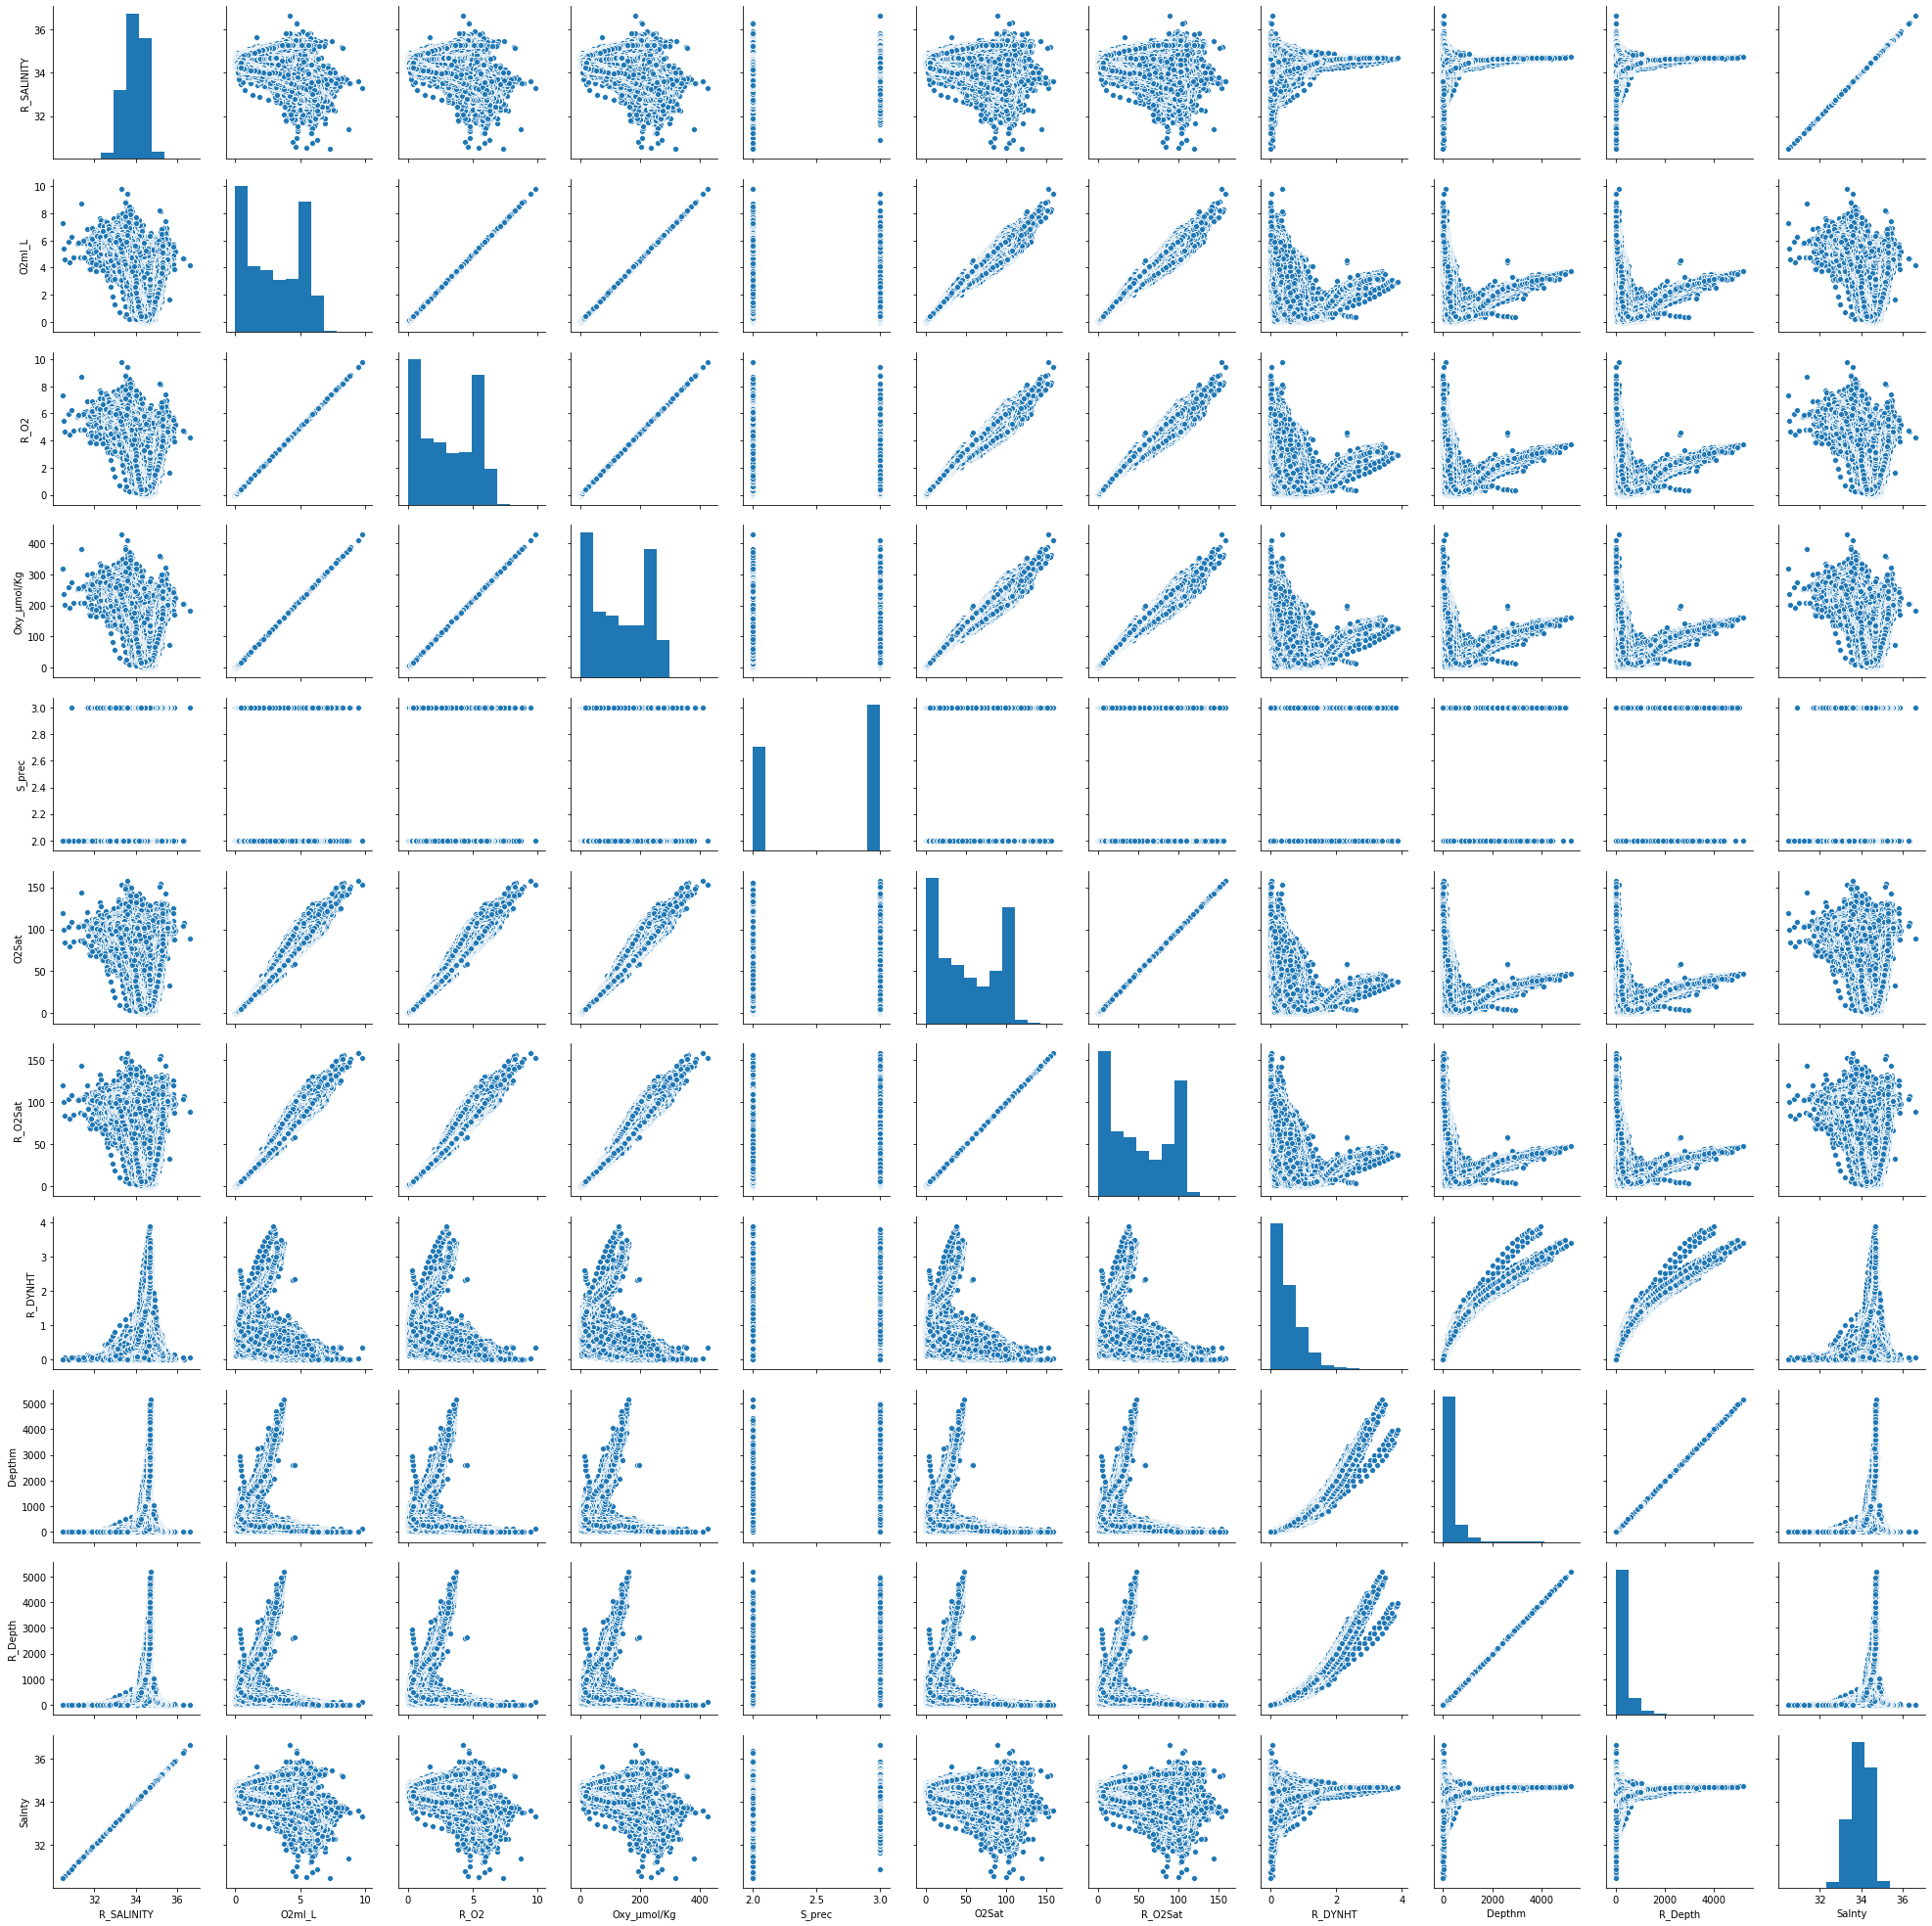

In [44]:
sns.pairplot(model_data)
plt.show()

### Salinity Distribution

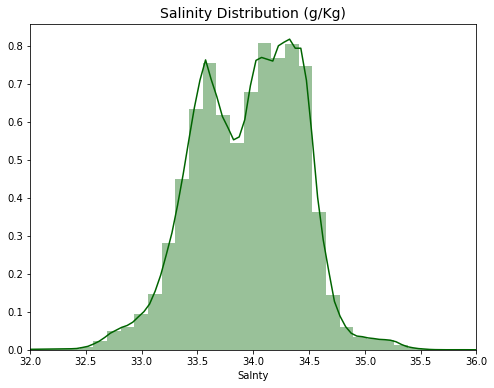

In [27]:
plt.figure(figsize=(8,6))
plt.xlim([32, 36])
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(model_data['Salnty'], color='darkgreen')
plt.show()

### Histogram

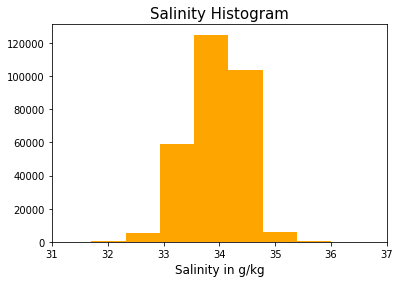

In [45]:
plt.hist(model_data['Salnty'],color='orange')
plt.xlim([31,37])
plt.xlabel("Salinity in g/kg",fontsize=12)
plt.title("Salinity Histogram",fontsize=15)
plt.show()

# Model Algorithm Starts

In this model, there are multiple independent features. Also, each independent feature has different range.So, we need to make equal range for all independent features.

First we use **standard scalar** from **preprocessing** module to rescale all features.

In [30]:
x = preprocessing.StandardScaler().fit(x).transform(x) 
x[0:5]   

array([[-1.94747801,  1.36067911,  1.36067911,  1.3594741 , -1.18426212,
         1.11522281,  1.11522275, -1.1591946 , -0.74314859, -0.74314859],
       [-2.1153403 ,  1.4277275 ,  1.4277275 ,  1.4266359 ,  0.84440765,
         1.17416686,  1.1741668 , -1.11246048, -0.71524321, -0.71524321],
       [-2.03247158,  1.43730584,  1.43730584,  1.43611948, -1.18426212,
         1.18220468,  1.18220462, -1.06572637, -0.70129052, -0.70129052],
       [-2.00059899,  1.4277275 ,  1.4277275 ,  1.42653702,  0.84440765,
         1.17684613,  1.17684607, -1.04235931, -0.68733782, -0.68733782],
       [-1.89648187,  1.41335999,  1.41335999,  1.41209961,  0.84440765,
         1.16880831,  1.16880825, -0.9956252 , -0.65943244, -0.65943244]])

### Now we split our data in train and test using train_test_split function

In [31]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25 )

In [32]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (224652, 10) and test_x : (74884, 10)
Size of train_y : (224652,) and test_y : (74884,)


### We import Linear Regression model from linear_model Module

In [33]:
MVLReg = linear_model .LinearRegression() 

### Now we fit MVLReg model using train set

In [34]:
MVLReg .fit( train_x , train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Now MVLReg Model is ready.

We get linear coefficients (Slope) and y-intercept of the Best fit line of the model

In [35]:
print( f"Coefficients are {MVLReg.coef_}" )
print( f"Y-intercept is {MVLReg.intercept_}" )

Coefficients are [ 4.70623858e-01  1.18918895e-15  8.32484024e-16 -2.17944115e-15
 -1.29495909e-16  2.76486307e-14 -2.77341158e-14  3.29870647e-17
  6.71276339e-17  6.71276339e-17]
Y-intercept is 33.946529615805794


### Predicting Vaues for test_x

In [36]:
pred_y=MVLReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [37]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

,Actual values,Predicted values
0,33.774,33.774
1,34.070,34.070
2,33.760,33.760
3,33.385,33.385
4,33.980,33.980
5,34.134,34.134
6,33.988,33.988
7,33.300,33.300
8,34.483,34.483
9,34.487,34.487


# Evaluation of MVLReg Model

Here, we evaluate the model using some error function and score functions

In [38]:
MVLReg.score(train_x,train_y)

1.0

In [39]:
r2s = r2_score(test_y,pred_y)
print( f"r2 Score is {r2s}")

r2 Score is 1.0


In [40]:
mae = mean_absolute_error(test_y,pred_y)
print( f"Mean Absolute Error is {mae}")

Mean Absolute Error is 7.106518544164385e-15


In [41]:
mse = mean_squared_error(test_y,pred_y)
print( f"Mean Squared Error is {mse}")

Mean Squared Error is 5.05085039135183e-29


In [42]:
me = max_error(test_y,pred_y)
print( f"Max Error is {me}")

Max Error is 1.0658141036401503e-14


In [43]:
error_df = pd.DataFrame({'r2 score': r2s , 'Mean Absolute Error' : mae , 'Mean Squared Error' : mse , 'Max Error' : me},index=[0])
error_df

,r2 score,Mean Absolute Error,Mean Squared Error,Max Error
0,1.0,7.106519e-15,5.050850e-29,1.065814e-14


# Conclusion

### From above table it is clear that this MVLReg Model .i.e., Multivariate Linear Regression is  best for this Dataset or to predict Salinity of water .